In [1]:
import bmxdata as bmx
import matplotlib.pyplot as plt
import numpy as np

In [174]:
root='bmxdata/raw/1909/190921_0500'

In [175]:
da1=bmx.BMXFile(root+"_D1.data")

In [176]:
da2=bmx.BMXFile(root+"_D2.data")

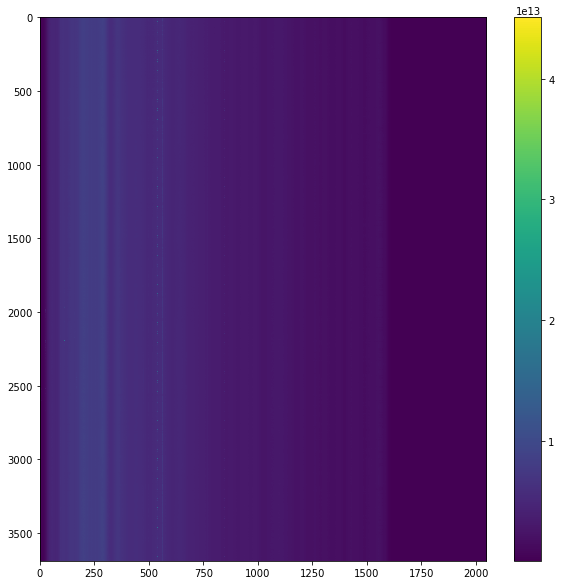

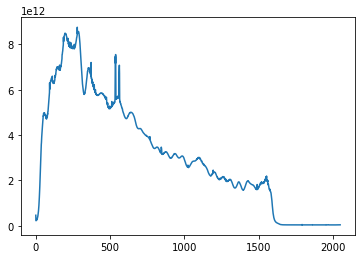

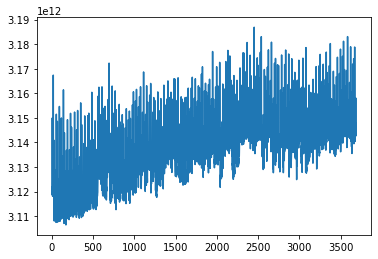

In [181]:
#dax=da1.data['chan1_1'][:2500]; Navg=512*32; freq=da1.freq[1]
dax=da1.data['chan1_0']; Navg=8192*32; freq=da1.freq[0]

plt.figure(figsize=(10,10))
plt.imshow((dax),aspect='auto')
plt.colorbar()
plt.figure()
plt.plot(dax.mean(axis=0))
plt.figure()
plt.plot(dax.mean(axis=1))

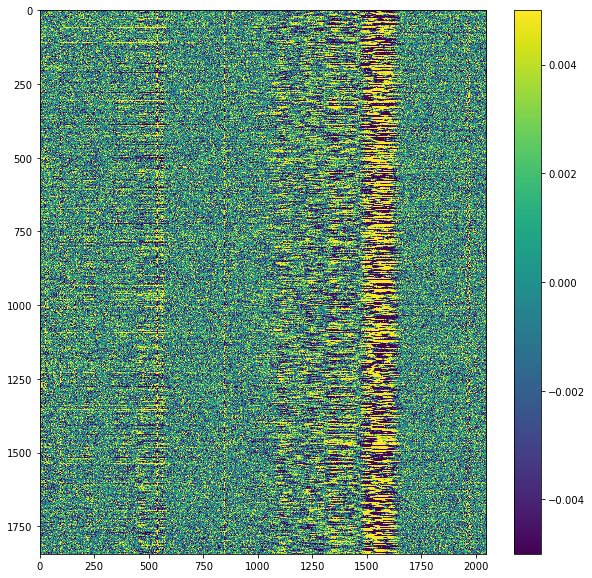

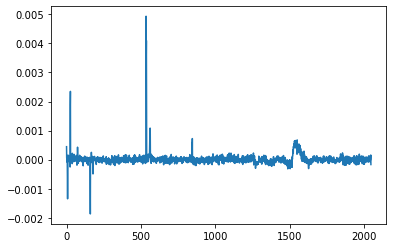

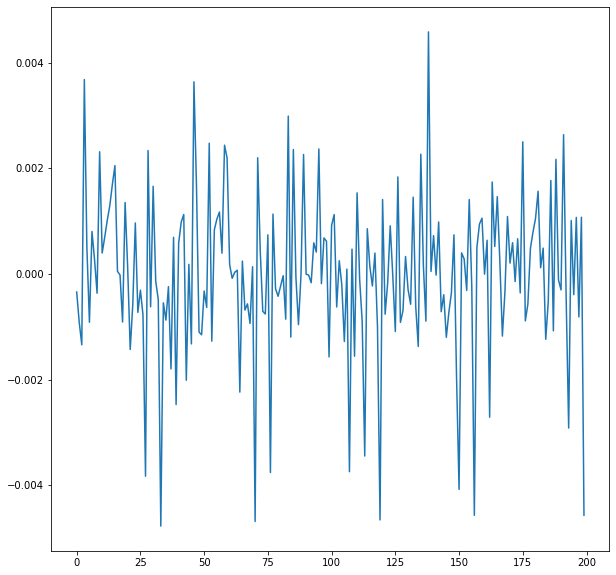

In [182]:
dax2=(dax[::2]-dax[1::2])/(0.5*(dax[::2]+dax[1::2]))
plt.figure(figsize=(10,10))
plt.imshow((dax2),aspect='auto',vmin=-0.005,vmax=0.005)
#plt.imshow((dax2),aspect='auto')
plt.colorbar()
plt.figure()
plt.plot(dax2.mean(axis=0))
plt.figure(figsize=(10,10))
plt.plot(dax2.mean(axis=1)[:200])

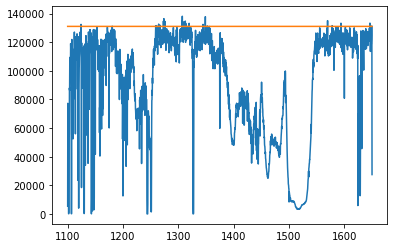

In [183]:
plt.plot(freq,1/(dax2**2).mean(axis=0))
plt.plot(freq,freq/freq*Navg/2)

In [231]:
def MakeAllFigs (da1,da2,root, cut=0, istart=0, iend=10000000):
    chlist=['chan%i_%i'%(i+1,cut) for i in range(4)]
    freq=da1.freq[cut]
    Navg=8192*32 if cut==0 else 512*32
    scale=0.01 if cut==0 else 0.05
    for ipm,ch in enumerate(chlist):
        ip=ipm+1
        dax1=da1.data[ch][istart:iend]
        dax2=da2.data[ch][istart:iend]
        plt.figure(1,figsize=(10,10))
        plt.subplot(4,2,2*ipm+1)
        plt.title(ch+' DAQ1',fontsize=10)
        plt.imshow(np.log10(dax1),aspect='auto')
        plt.subplot(4,2,2*ipm+2)
        plt.title(ch+' DAQ2',fontsize=10)
        plt.imshow(np.log10(dax2),aspect='auto')
        plt.figure(2,figsize=(10,10))
        plt.subplot(2,2,ip)
        plt.plot(freq,dax1.mean(axis=0),'r-',label=ch+" DAQ1")
        plt.plot(freq,dax2.mean(axis=0),'b-',label=ch+" DAQ2")
        plt.figure(3,figsize=(10,10))
        plt.subplot(2,2,ip)
        plt.plot(dax1.mean(axis=1),'r-',label=ch+" DAQ1")
        plt.plot(dax2.mean(axis=1),'b-',label=ch+" DAQ2")
        dar1=(dax1[::2]-dax1[1::2])/(0.5*(dax1[::2]+dax1[1::2]))             
        dar2=(dax2[::2]-dax2[1::2])/(0.5*(dax2[::2]+dax2[1::2]))               
        plt.figure(4,figsize=(10,10))
        plt.subplot(4,2,2*ipm+1)
        plt.title(ch+' DAQ1',fontsize=10)
        plt.imshow(dar1,vmin=-scale,vmax=scale,aspect='auto')
        plt.subplot(4,2,2*ipm+2)
        plt.title(ch+' DAQ2',fontsize=10)
        plt.imshow(dar2,vmin=-scale,vmax=scale,aspect='auto')
        plt.figure(5,figsize=(10,10))
        plt.subplot(2,2,ip)
        plt.plot(freq,dar1.mean(axis=0),'r-',label=ch+" DAQ1")
        plt.plot(freq,dar2.mean(axis=0),'b-',label=ch+" DAQ2")
        plt.figure(6,figsize=(10,10))
        plt.subplot(2,2,ip)
        plt.plot(dax1.mean(axis=1),'r-',label=ch+" DAQ1")
        plt.plot(dax2.mean(axis=1),'b-',label=ch+" DAQ2")
        plt.figure(7,figsize=(10,10))
        plt.subplot(2,2,ip)
        plt.plot(freq,1/(dar1**2).mean(axis=0),'r-',label=ch+" DAQ1")
        plt.plot(freq,1/(dar2**2).mean(axis=0),'b-',label=ch+" DAQ2")
        plt.plot(freq,freq/freq*Navg/2)
    for fi in range(1,8):
        plt.figure(fi)
        if fi in [2,3,5,6,7]:
            for k in range(1,5):
                plt.subplot(2,2,k)
                plt.legend()
        fname=root+"_%i.png"%fi
        print(fname)
        plt.savefig(fname,dpi=200)
        plt.close()
    
        
    

In [233]:
root='bmxdata/raw/1909/190921_0500'
da1=bmx.BMXFile(root+"_D1.data")
da2=bmx.BMXFile(root+"_D2.data")
MakeAllFigs(da1,da2,'./Sep23A')
MakeAllFigs(da1,da2,'./Sep23B',cut=1)


./Sep23A_1.png


/astro/u/anze/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


./Sep23A_2.png
./Sep23A_3.png
./Sep23A_4.png
./Sep23A_5.png
./Sep23A_6.png
./Sep23A_7.png
./Sep23B_1.png
./Sep23B_2.png
./Sep23B_3.png
./Sep23B_4.png
./Sep23B_5.png
./Sep23B_6.png
./Sep23B_7.png


In [235]:
root='bmxdata/raw/1909/190921_0800'
da1=bmx.BMXFile(root+"_D1.data")
da2=bmx.BMXFile(root+"_D2.data")
MakeAllFigs(da1,da2,'./Sep23C',iend=2500)
MakeAllFigs(da1,da2,'./Sep23D',iend=2500,cut=1)

./Sep23C_1.png


/astro/u/anze/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


./Sep23C_2.png
./Sep23C_3.png
./Sep23C_4.png
./Sep23C_5.png
./Sep23C_6.png
./Sep23C_7.png
./Sep23D_1.png
./Sep23D_2.png
./Sep23D_3.png
./Sep23D_4.png
./Sep23D_5.png
./Sep23D_6.png
./Sep23D_7.png
